In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [91]:
df_raw = pd.read_excel('data/transactions.xlsx')

In [92]:
df = df_raw.copy()

In [93]:
df.head()

,account,date,ticker,currency,asset_type,transaction_type,amount,price,commision,pln_exr,total_pln
0,treasury_bonds_pl,2020-02-08,COI,PLN,bonds,buy,600.0000,100.0000,0.0000,1.0000,60000.0000
1,treasury_bonds_pl,2023-09-01,TOS,PLN,bonds,buy,100.0000,100.0000,0.0000,1.0000,10000.0000
2,treasury_bonds_pl,2023-10-02,EDO,PLN,bonds,buy,10.0000,100.0000,0.0000,1.0000,1000.0000
3,treasury_bonds_pl,2023-11-09,EDO,PLN,bonds,buy,10.0000,100.0000,0.0000,1.0000,1000.0000
4,ikze,2023-11-21,EDO,PLN,bonds,buy,83.0000,100.0000,0.0000,1.0000,8300.0000


In [94]:
df.account.unique()

array(['treasury_bonds_pl', 'ikze', 'xtb', 'ike'], dtype=object)

In [95]:
df_group = df[['account', 'ticker', 'asset_type', 'amount','total_pln']]

In [96]:
df_group['quarter'] = df['date'].dt.year.astype(str) + "Q" + df['date'].dt.quarter.astype(str)

In [97]:
df_group.groupby(['account', 'asset_type']).sum()['total_pln'].reset_index()

,account,asset_type,total_pln
0,ike,etf_bond,12303.8458
1,ike,etf_stock,4239.4353
2,ikze,bonds,8300.0000
3,treasury_bonds_pl,bonds,72000.0000
4,xtb,etf_bond,3299.8717
5,xtb,etf_stock,10796.0439
6,xtb,stock_pl,3217.4400


In [98]:
df_group.groupby(['asset_type', 'quarter']).sum()['amount'].reset_index()

,asset_type,quarter,amount
0,bonds,2020Q1,600.0000
1,bonds,2023Q3,100.0000
2,bonds,2023Q4,103.0000
3,etf_bond,2023Q3,74.0000
4,etf_bond,2023Q4,681.0000
5,etf_bond,2024Q1,317.0000
6,etf_stock,2023Q3,40.0000
7,etf_stock,2023Q4,47.0000
8,etf_stock,2024Q1,9.0000
9,stock_pl,2023Q1,110.0000


In [99]:
df_pivot = pd.pivot_table(df_group, values='amount', index='quarter', columns='asset_type',aggfunc='sum').reset_index()

In [100]:
df_pivot.columns

Index(['quarter', 'bonds', 'etf_bond', 'etf_stock', 'stock_pl'], dtype='object', name='asset_type')

In [101]:
df_pivot

asset_type,quarter,bonds,etf_bond,etf_stock,stock_pl
0,2020Q1,600.0000,NaN,NaN,NaN
1,2023Q1,NaN,NaN,NaN,110.0000
2,2023Q2,NaN,NaN,NaN,57.0000
3,2023Q3,100.0000,74.0000,40.0000,26.0000
4,2023Q4,103.0000,681.0000,47.0000,109.0000
5,2024Q1,NaN,317.0000,9.0000,NaN


<Axes: title={'center': 'Buys by quarter'}, ylabel='quarter'>

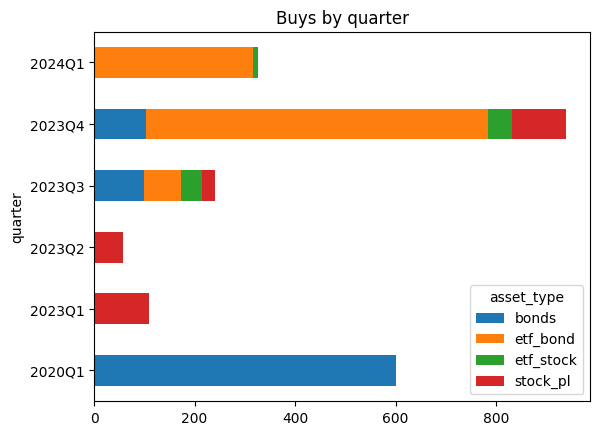

In [102]:
df_pivot.plot( 
    x = 'quarter', 
    kind = 'barh', 
    stacked = True, 
    title = 'Buys by quarter', 
    mark_right = True) 

In [88]:
# to jest tylko ilość kupiona na dany moment, a potrzeba mi cyklicznego podumowania ilości każdego assetu i cen

In [50]:
# żeby to wyżej działało jak trzeba, musi być tabelka z historią portfela, gdzie sumowane aktywa będą miały obliczane wartości na daną datę (np. koniec kwartału)

In [89]:
# napisać algorytm który sprawdza jakie są assety w transakcjach i przelicza dla nich historię, jak się coś pojawi to po tej dacie dodawany jest do cyklicznego generowania historii

In [104]:
# na koniec każdego kwartału jest brany kurs walut i aktywów i obliczana jest wartość bazując na amount

In [106]:
# ogarnąć interaktywne ploty współpracujące z dashem (pewnie plotly) 
# https://plotly.com/python/bar-charts/